In [1]:
FRAME_SIZE = 150
HOP_RATIO = 0.1
N_FFT = 1024

In [2]:
import importlib
import modules.AudioProcessor
importlib.reload(modules.AudioProcessor)
from modules.AudioProcessor import AudioProcessor

audio_files = [
    './dataset/trimmed_crowd_talking.mp3',
    './dataset/trimmed_motor_riding.mp3',
    './dataset/trimmed_water_flowing.mp3'
]
ap = AudioProcessor(
    audio_files, 
    frame_size_ms=FRAME_SIZE, 
    hop_length_ratio=HOP_RATIO
    )
print(ap.frames.shape)
print(ap.class_ids.shape)
print(ap.timestamps.shape)

torch.Size([2664, 7200])
(2664,)
(2664,)


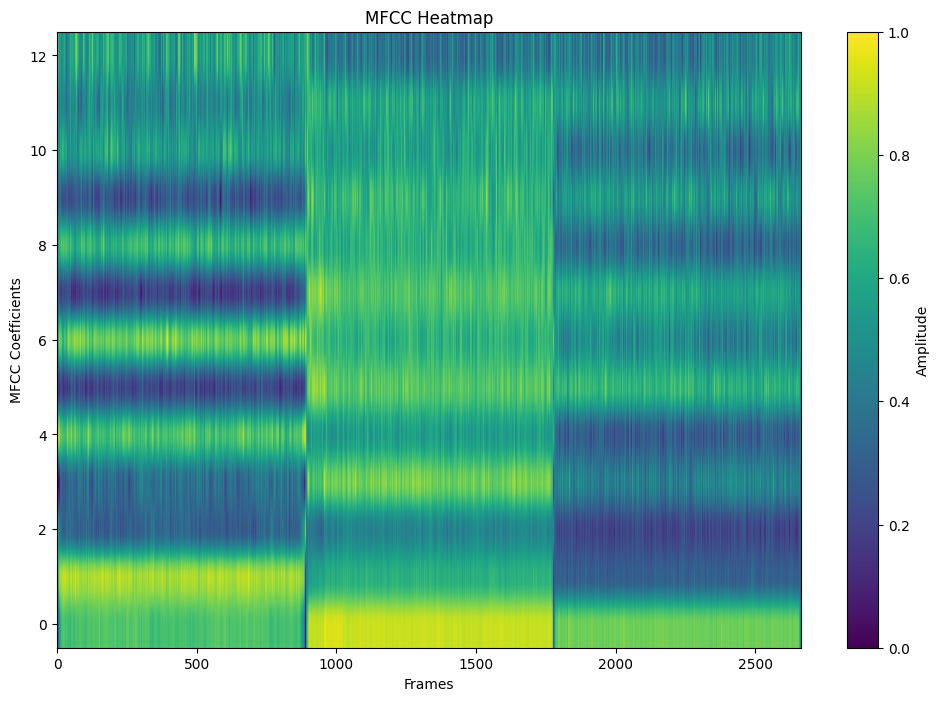

torch.Size([2664, 13])

In [3]:
import importlib
import modules.FeatureExtractor
importlib.reload(modules.FeatureExtractor)
from modules.FeatureExtractor import FeatureExtractor

fe = FeatureExtractor(n_fft=N_FFT)
fe.extract_mfcc(ap.frames)
fe.plot_mfccs()
fe.mfcc_features.shape

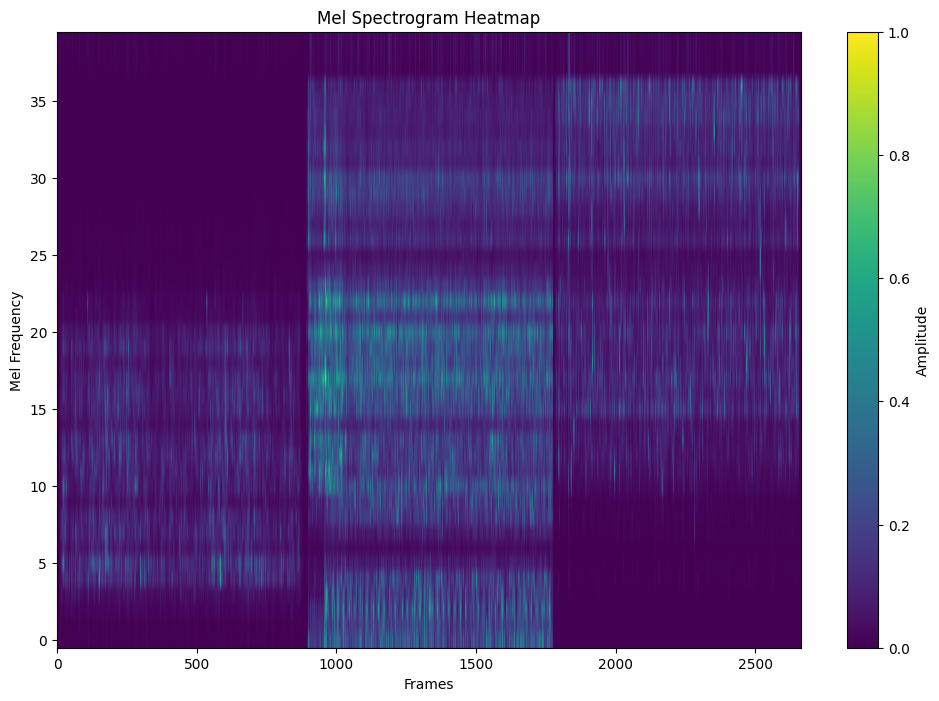

torch.Size([2664, 40])

In [4]:
fe.extract_melspectrogram(ap.frames)
fe.plot_melspectrogram()
fe.melspectrogram_features.shape

In [5]:
import warnings
import importlib
import modules.DatasetHandler
importlib.reload(modules.DatasetHandler)
from modules.DatasetHandler import DatasetHandler

warnings.filterwarnings("ignore")

dh = DatasetHandler(
    class_ids=ap.class_ids,
    timestamps=ap.timestamps, 
    mfccs=fe.mfcc_features, 
    mfsc=fe.melspectrogram_features,
    output_dir='output/no_pca' 
)
dh.generate_csv('all_features.csv')

In [6]:
important_mfccs = [i for i in range(13)]
important_mfsc = []
dh.save_selected_features(important_mfccs, important_mfsc, "mfccs_only.csv")
time_series_tensor = dh.generate_time_series('mfccs_only.csv', 'mfccs')

important_mfccs = []
important_mfsc = [i for i in range(40)]
dh.save_selected_features(important_mfccs, important_mfsc, "melspec_only.csv")
time_series_tensor = dh.generate_time_series('melspec_only.csv', 'melspec')

important_mfccs = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
important_mfsc = [i for i in range(14)] + [i for i in range(16, 35)]
dh.save_selected_features(important_mfccs, important_mfsc, "combined.csv")
time_series_tensor = dh.generate_time_series('combined.csv', 'combined')


In [15]:
import modules.ART2Clusterer
importlib.reload(modules.ART2Clusterer)
from modules.ART2Clusterer import ART2ClustererSmoothing
import pandas as pd

def cluster_dataset(i, filename, n_features, plot_name, vigilance, pca=False):
    magenta = "\033[35m"
    green = "\033[32m"
    end = "\033[0m"
    optimal_tag = f"{green}(Optimal){end}" if not pca and filename == "combined" else ""
    print(f"{magenta}Clustering time series {i}{end} - {filename} features {optimal_tag}")

    df = pd.read_csv(f'output/{"" if pca else "no_"}pca/time_series_{i}/{filename}_{i}.csv')
    clusterer = ART2ClustererSmoothing(
        vigilance=vigilance,
        n_features=n_features,
        time_series_index=i,
        buffer_size=5
    )
    for index, row in df.iterrows():
        clusterer.fit_clusters(row)

    clusterer.write_to_csv()
    conf_matrix, acc = clusterer.calc_accuracy()
    print(f"{green}Accuracy:{end} {acc}")
    print(f"{green}Confusion Matrix:{end}\n{conf_matrix}")
    clusterer.plot_truth_vs_time(plot_name)

# Optimal Clustering Results for No PCA
Look at the graphs for the combined features

Clustering time series 0 - mfccs features 
Accuracy: 0.9909604519774011
Confusion Matrix:
[[282   0   0]
 [  1 192   2]
 [  2   3 403]]


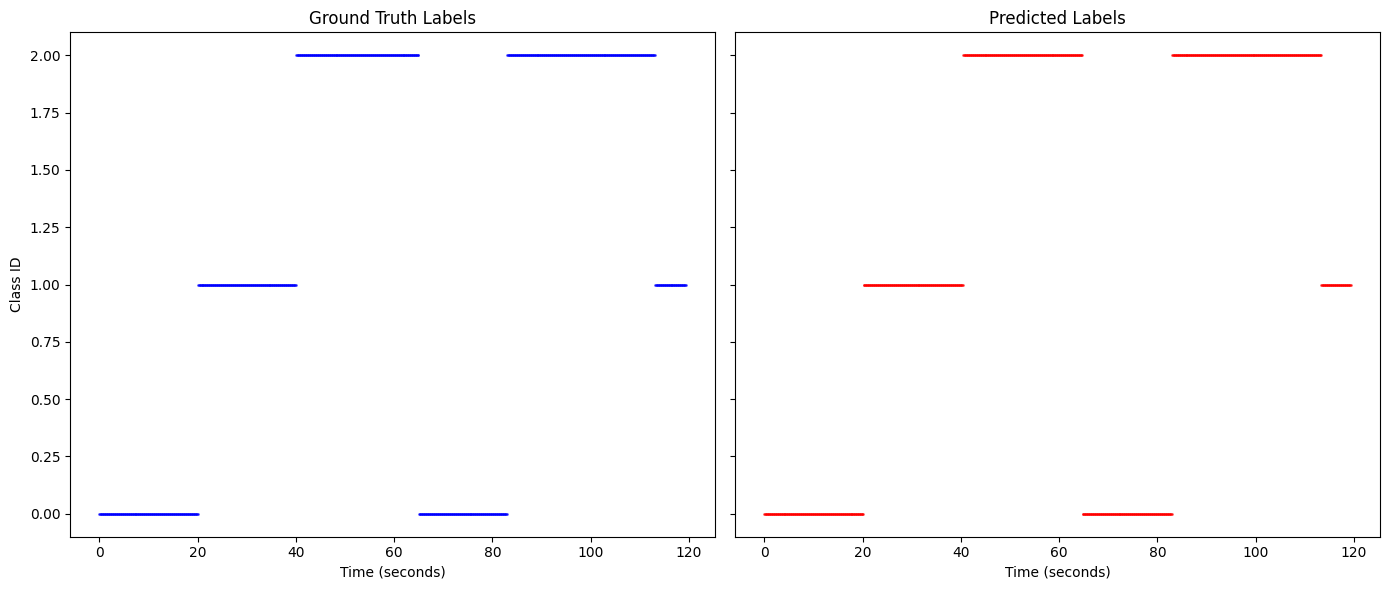

Clustering time series 0 - melspec features 
Accuracy: 0.9898305084745763
Confusion Matrix:
[[223   2   4]
 [  1 313   1]
 [  1   0 340]]


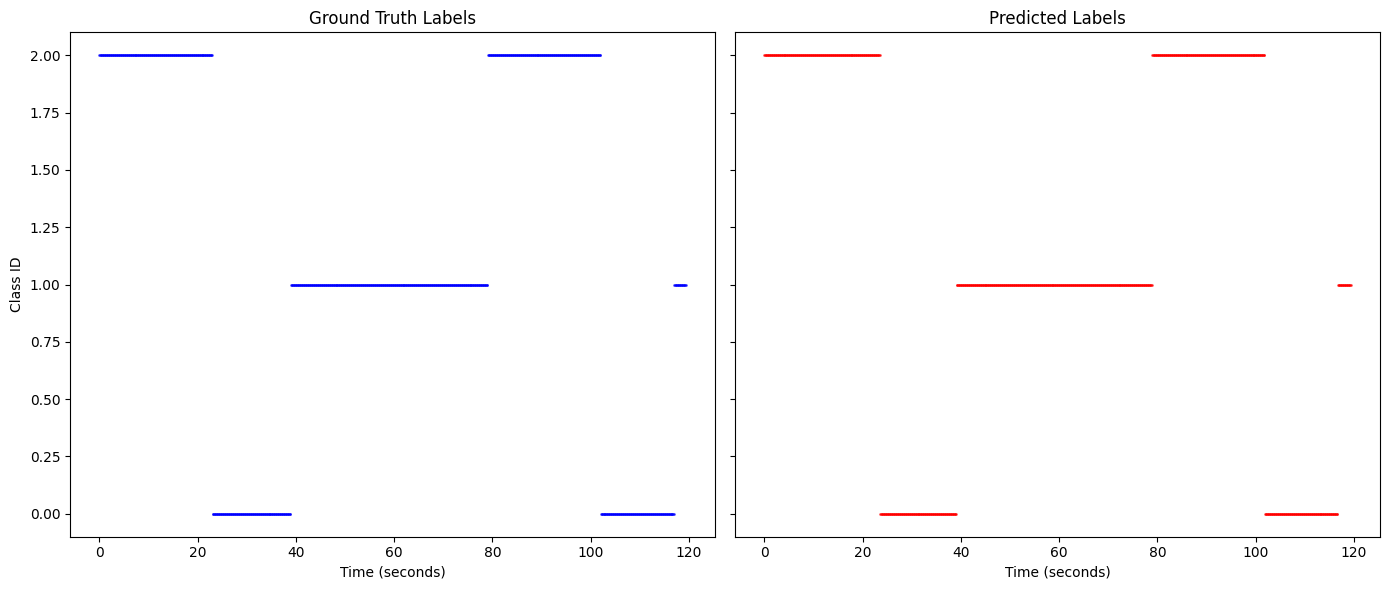

Clustering time series 0 - combined features (Optimal)
Accuracy: 0.9932203389830508
Confusion Matrix:
[[303   1   1]
 [  0 292   0]
 [  2   2 284]]


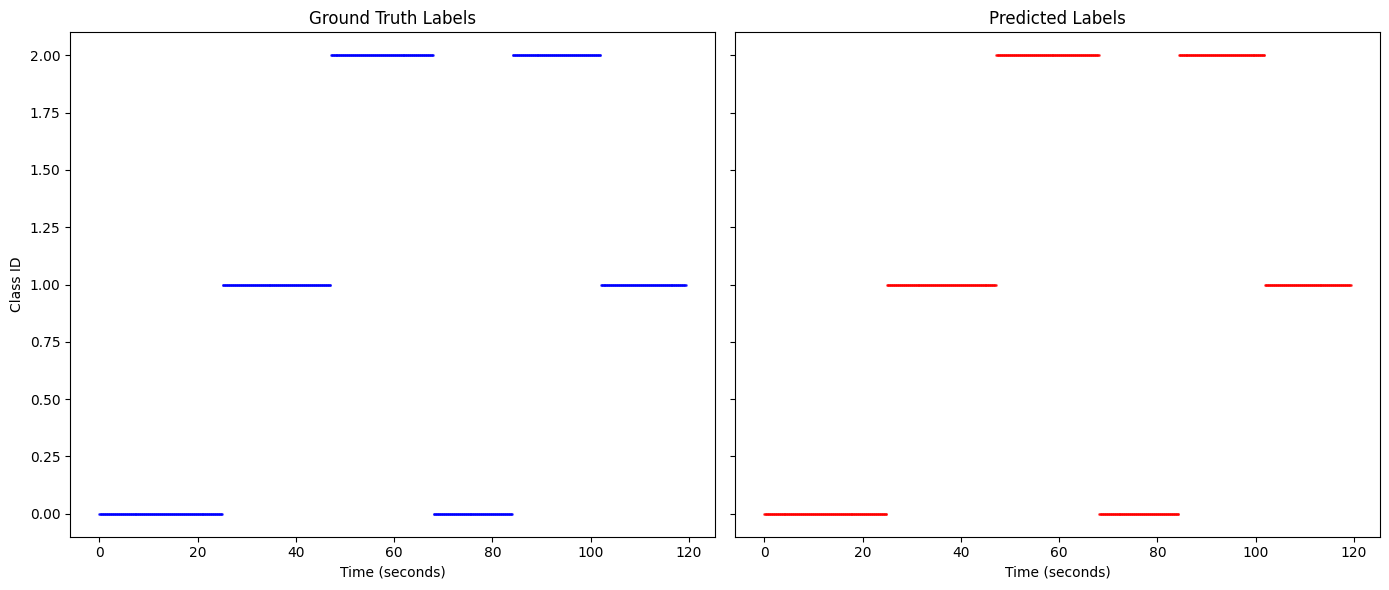

--------------------------------------------------------------------------------
Clustering time series 1 - mfccs features 
Accuracy: 0.7807909604519774
Confusion Matrix:
[[297   0   0]
 [  1 254   0]
 [  2 191 140]]


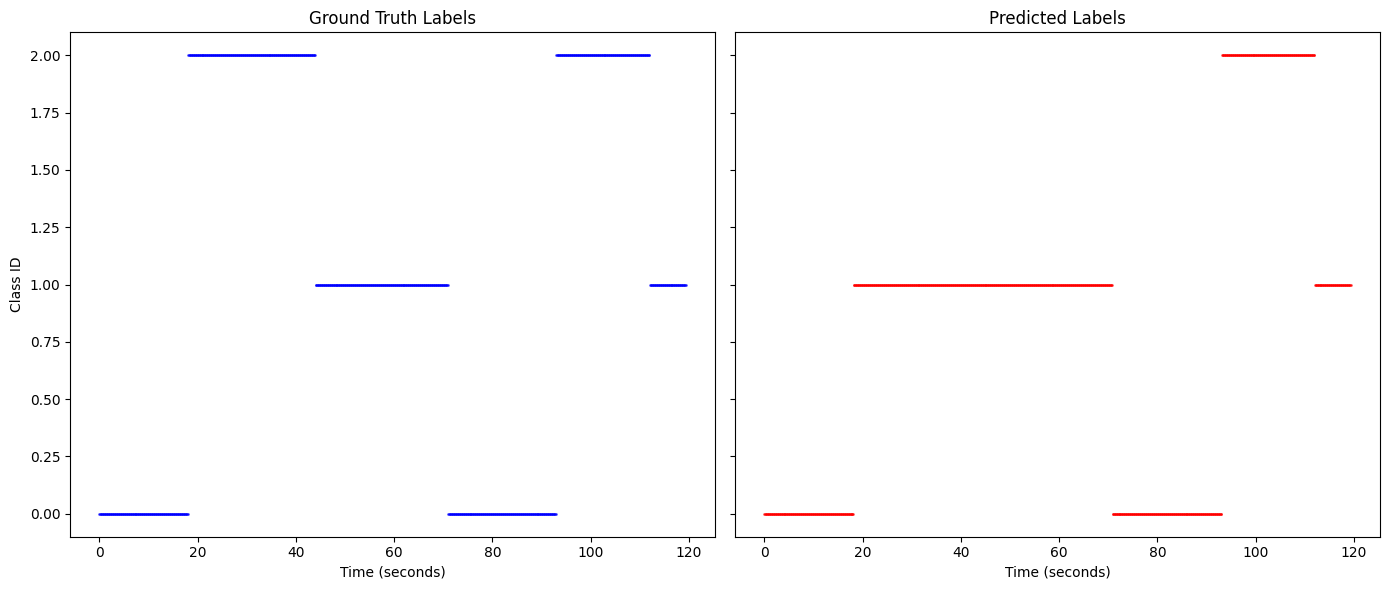

Clustering time series 1 - melspec features 
Accuracy: 0.6937853107344633
Confusion Matrix:
[[394   0   0]
 [  3 115   0]
 [268   0 105]]


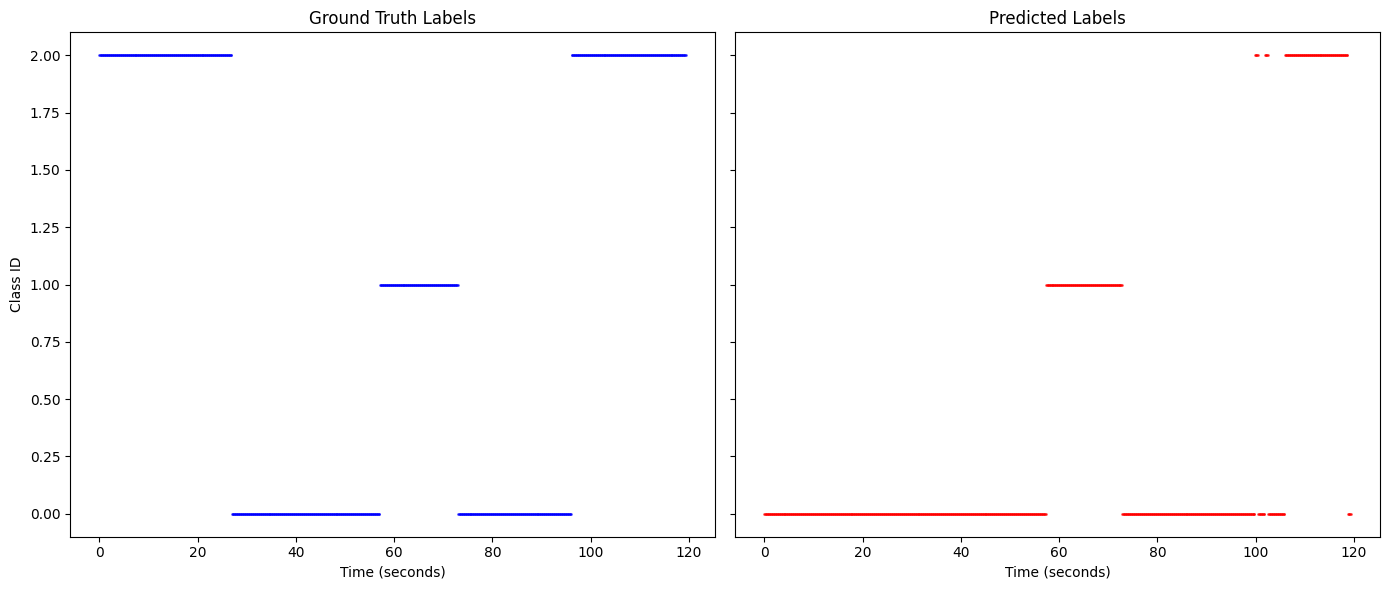

Clustering time series 1 - combined features (Optimal)
Accuracy: 0.9706214689265537
Confusion Matrix:
[[345   3   1]
 [  0 282   7]
 [  0   0 232]]


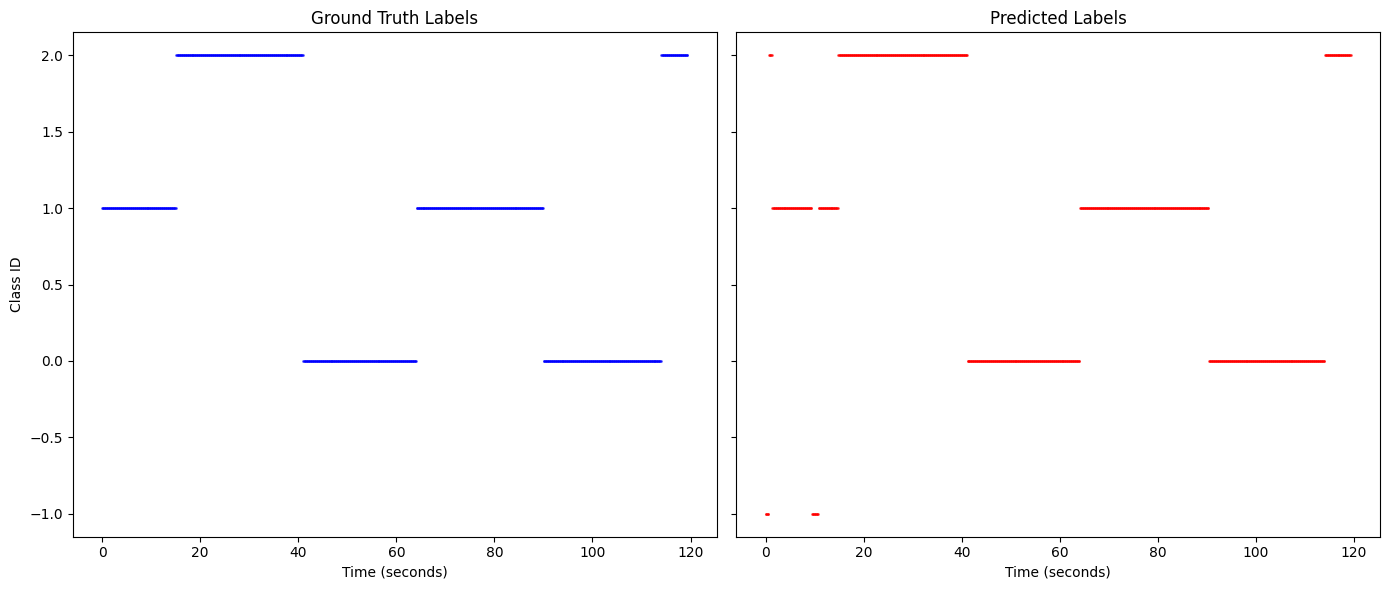

--------------------------------------------------------------------------------
Clustering time series 2 - mfccs features 
Accuracy: 0.7774011299435029
Confusion Matrix:
[[329   0   0]
 [  5 190 186]
 [  1   0 169]]


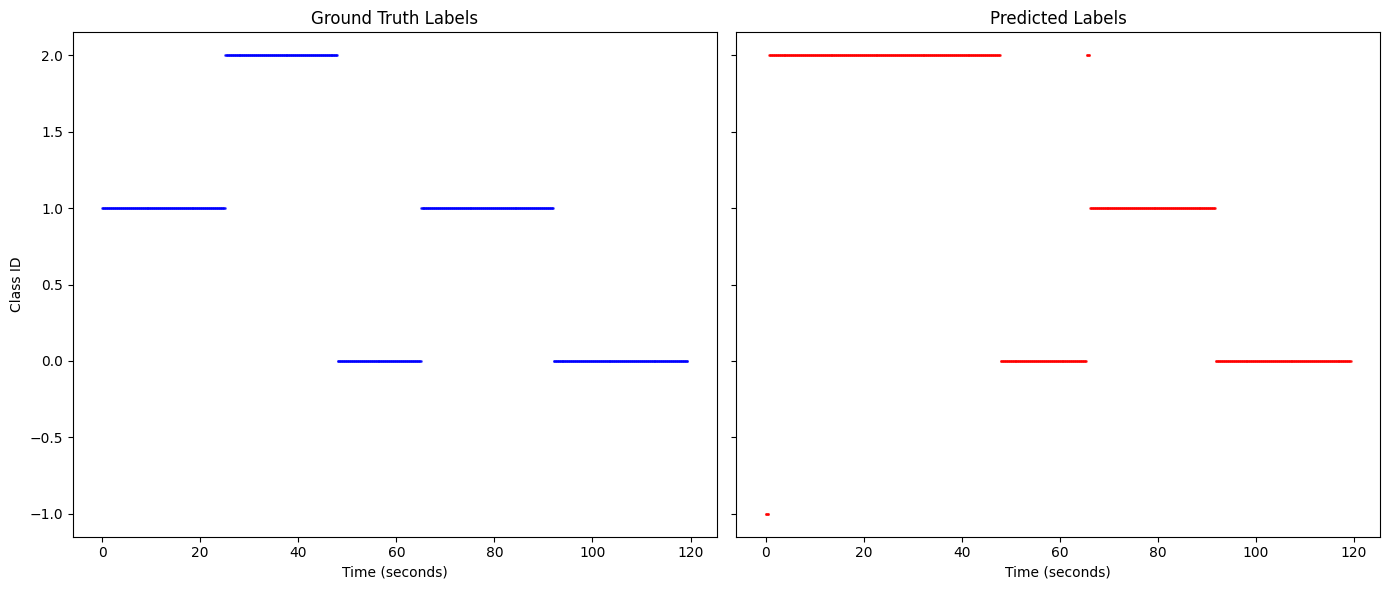

Clustering time series 2 - melspec features 
Accuracy: 0.7073446327683616
Confusion Matrix:
[[353   2   0]
 [  1 273   0]
 [256   0   0]]


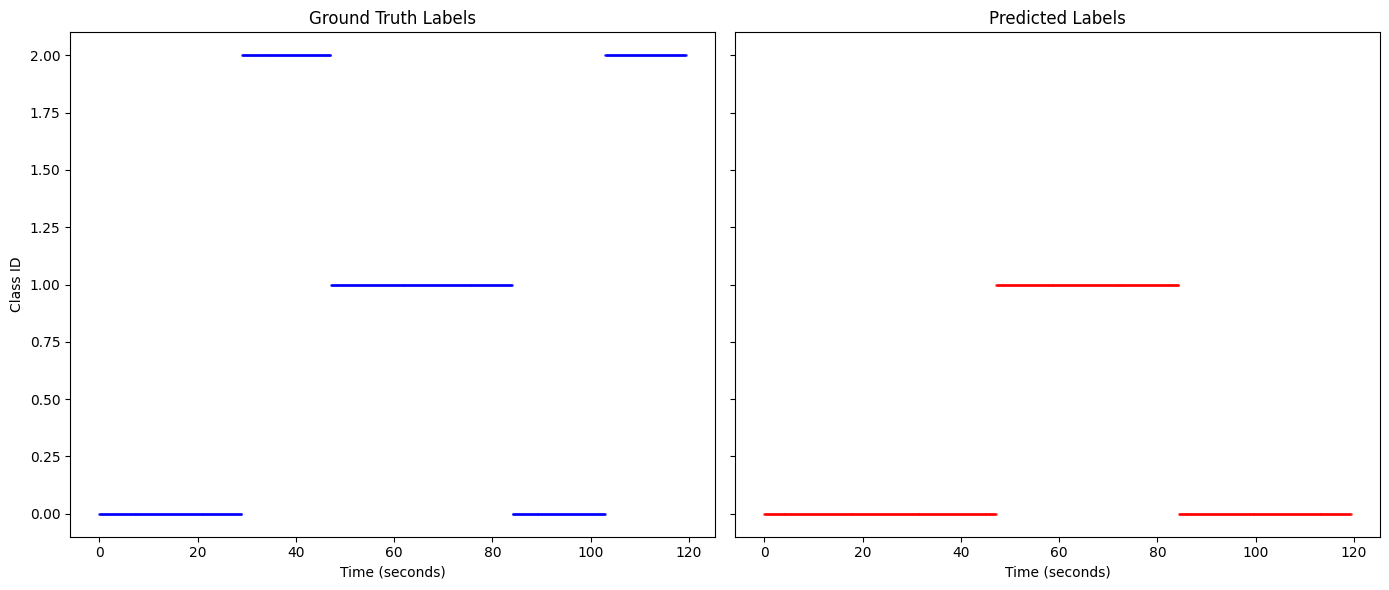

Clustering time series 2 - combined features (Optimal)
Accuracy: 0.9954802259887006
Confusion Matrix:
[[303   0   0]
 [  2 274   1]
 [  0   1 304]]


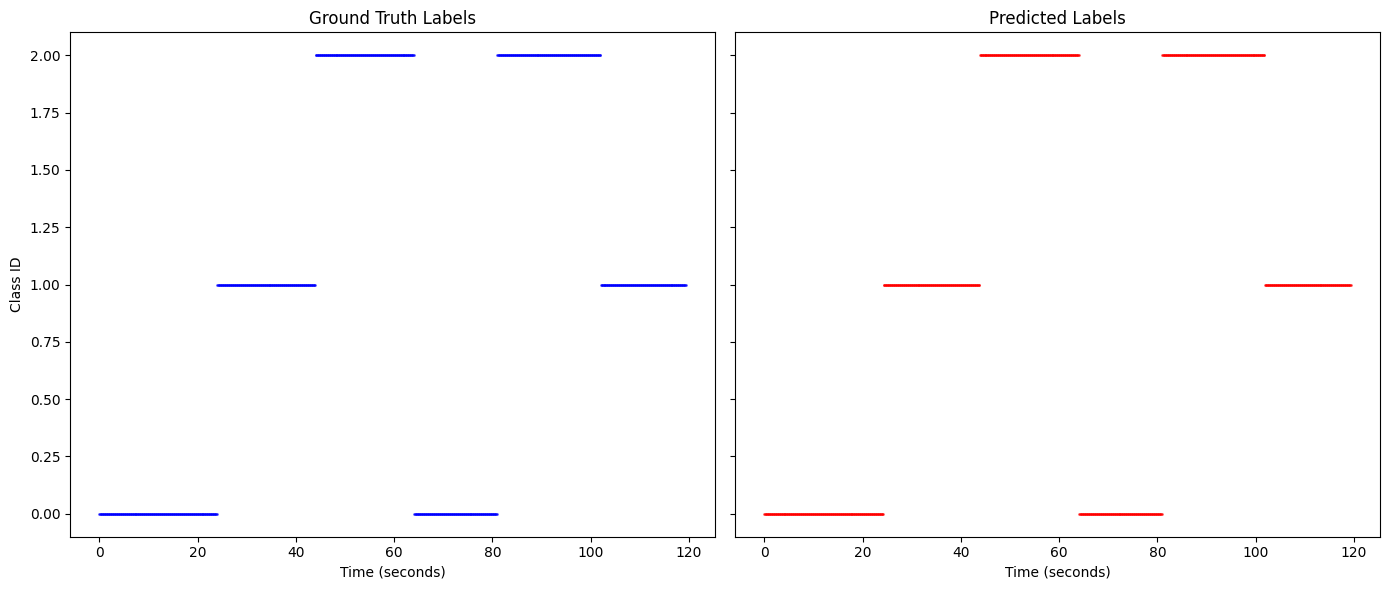

--------------------------------------------------------------------------------
Clustering time series 3 - mfccs features 
Accuracy: 0.7988700564971751
Confusion Matrix:
[[378   0   0]
 [  5 284   0]
 [  2 171  45]]


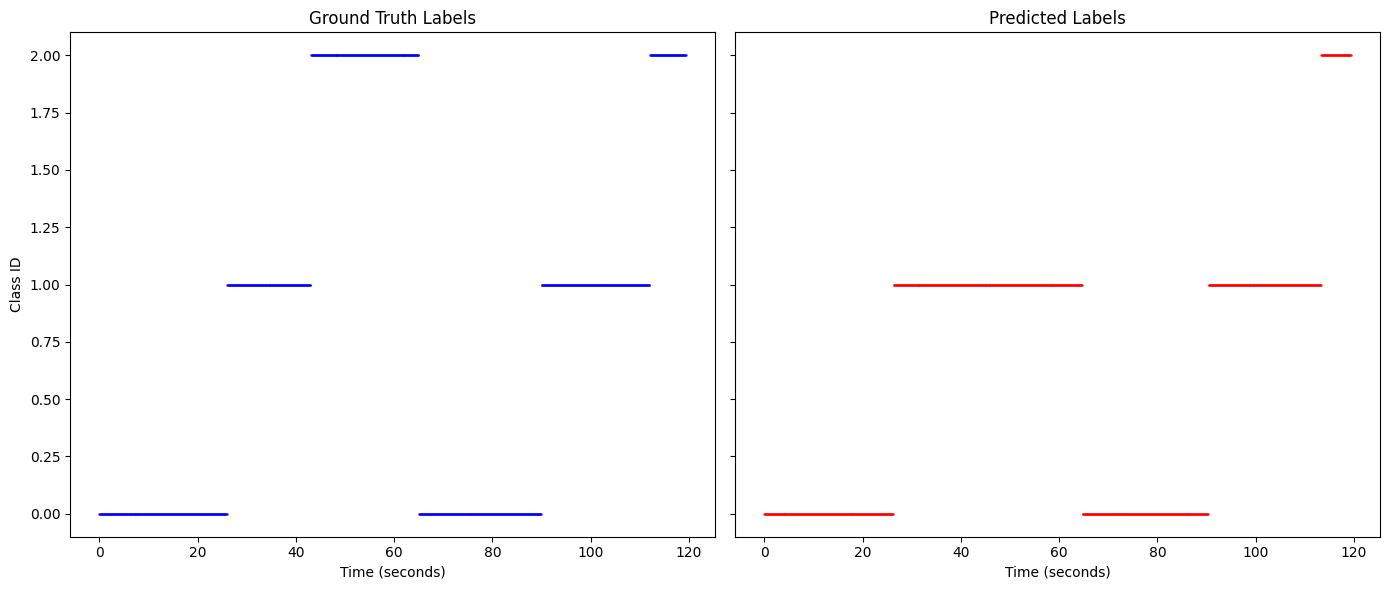

Clustering time series 3 - melspec features 
Accuracy: 0.6711864406779661
Confusion Matrix:
[[334   0   0]
 [  7 260   0]
 [284   0   0]]


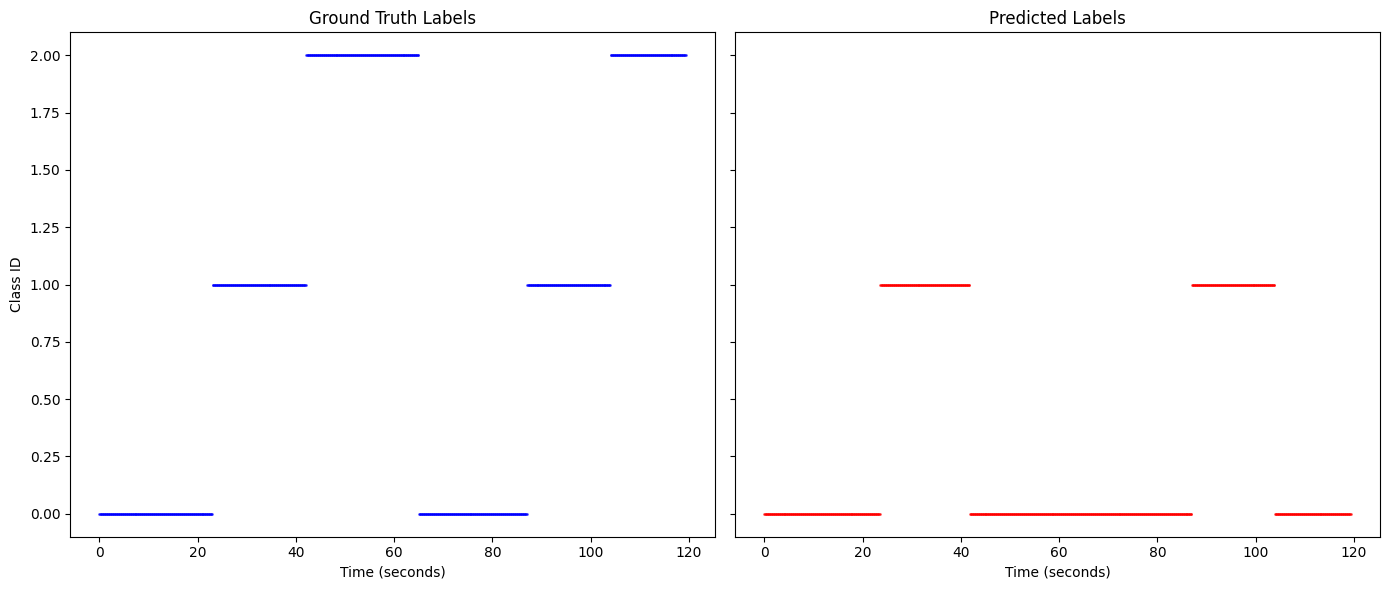

Clustering time series 3 - combined features (Optimal)
Accuracy: 0.9898305084745763
Confusion Matrix:
[[277   4   0]
 [  2 324   0]
 [  1   2 275]]


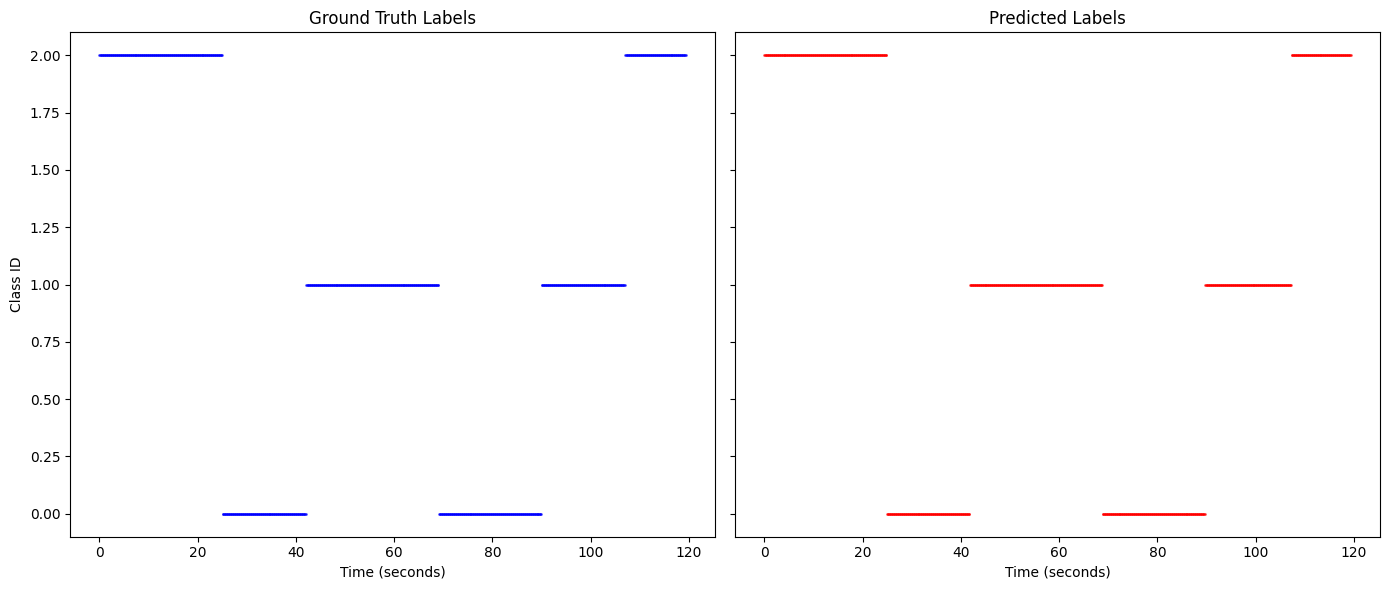

--------------------------------------------------------------------------------
Clustering time series 4 - mfccs features 
Accuracy: 0.992090395480226
Confusion Matrix:
[[341   0   0]
 [  2 347   0]
 [  2   3 190]]


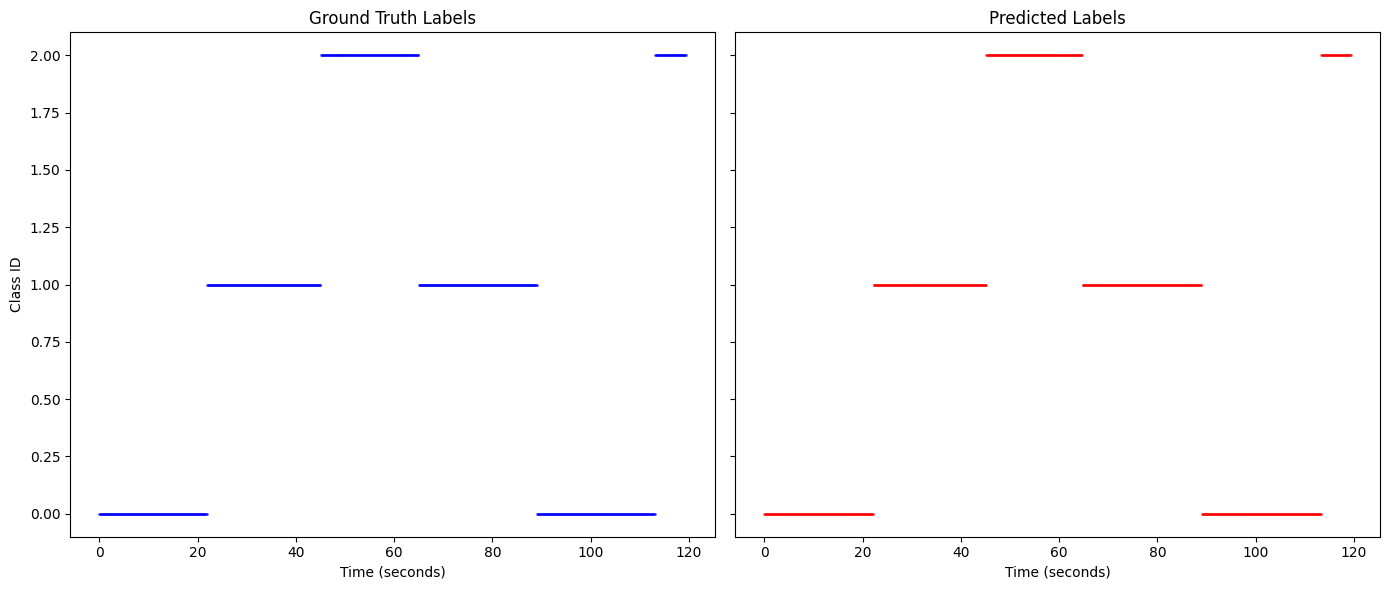

Clustering time series 4 - melspec features 
Accuracy: 0.696045197740113
Confusion Matrix:
[[  0   1 258]
 [  5 311   2]
 [  0   3 305]]


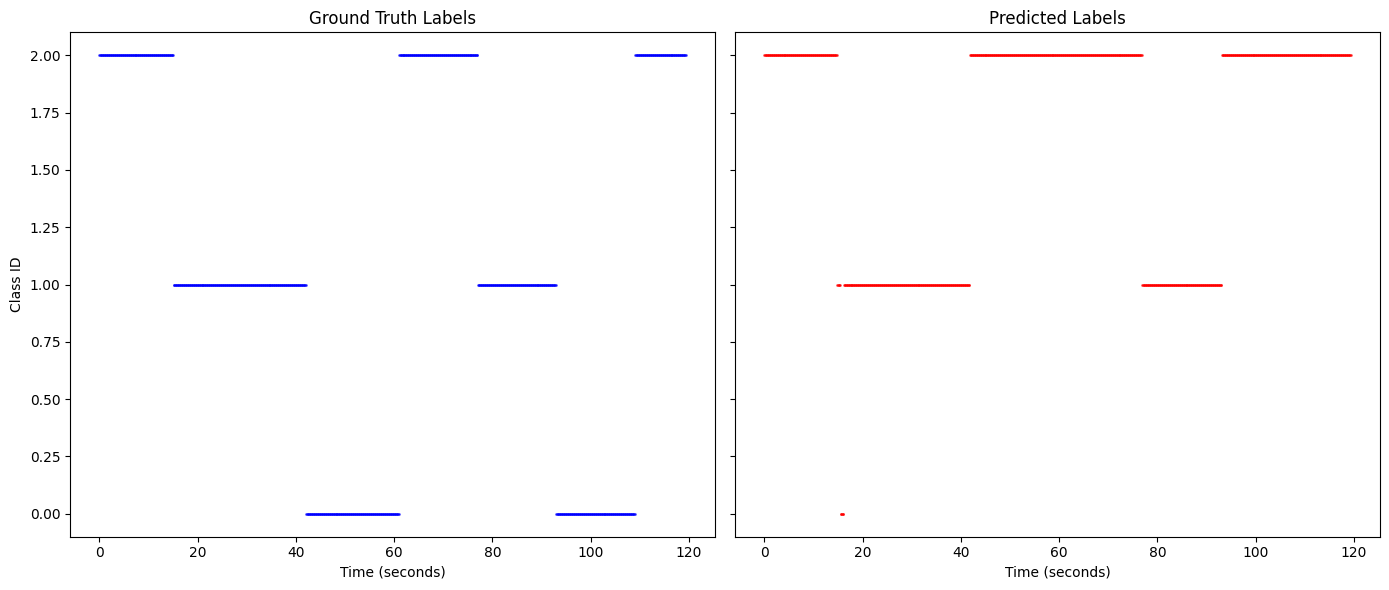

Clustering time series 4 - combined features (Optimal)
Accuracy: 0.9954802259887006
Confusion Matrix:
[[269   1   0]
 [  0 222   0]
 [  1   2 390]]


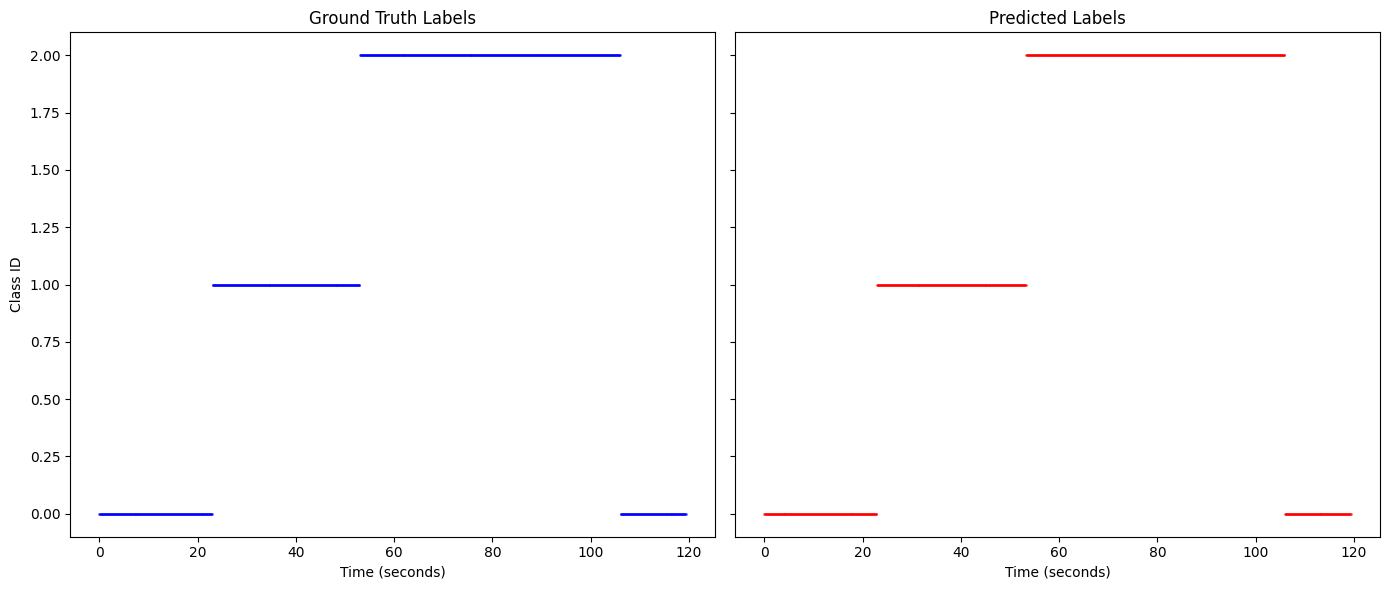

--------------------------------------------------------------------------------


In [16]:
MFCC_VIGILANCE = 0.5
MELSPEC_VIGILANCE = 0.5
COMBINED_VIGILANCE = 0.55

n_features = len(important_mfccs) + len(important_mfsc)
for i in range(5):
    cluster_dataset(i, 'mfccs', 13, 'MFCCs Only Ground Truth vs Predicted Labels', MFCC_VIGILANCE)
    cluster_dataset(i, 'melspec', 40, 'MFSCs Only Ground Truth vs Predicted Labels', MELSPEC_VIGILANCE)
    cluster_dataset(i, 'combined', n_features, 'Combined Ground Truth vs Predicted Labels', COMBINED_VIGILANCE)
    print('-'*80)

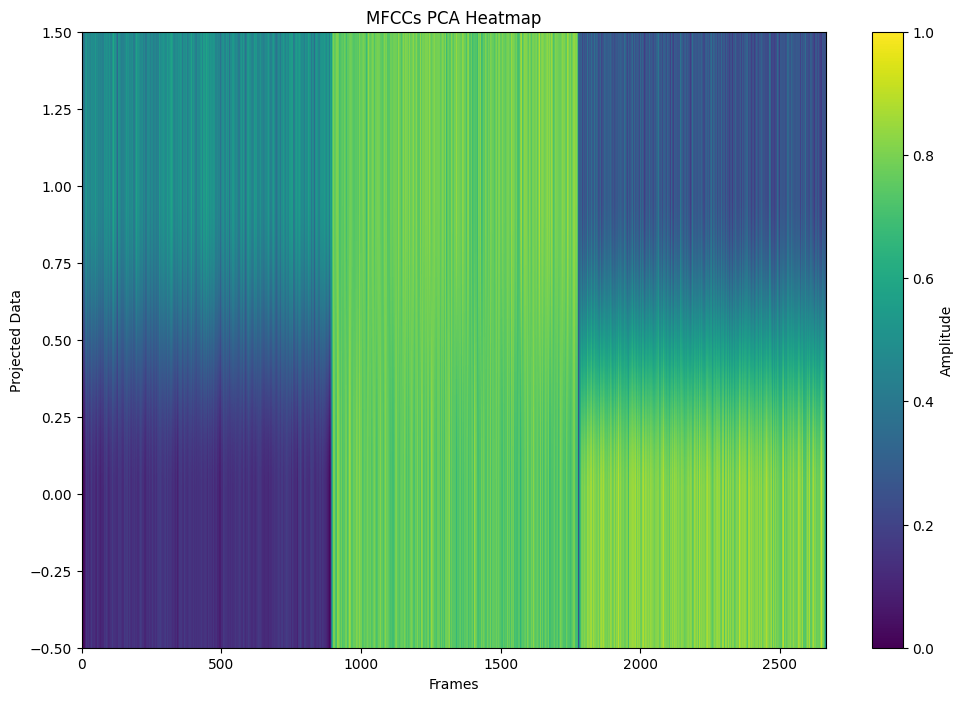

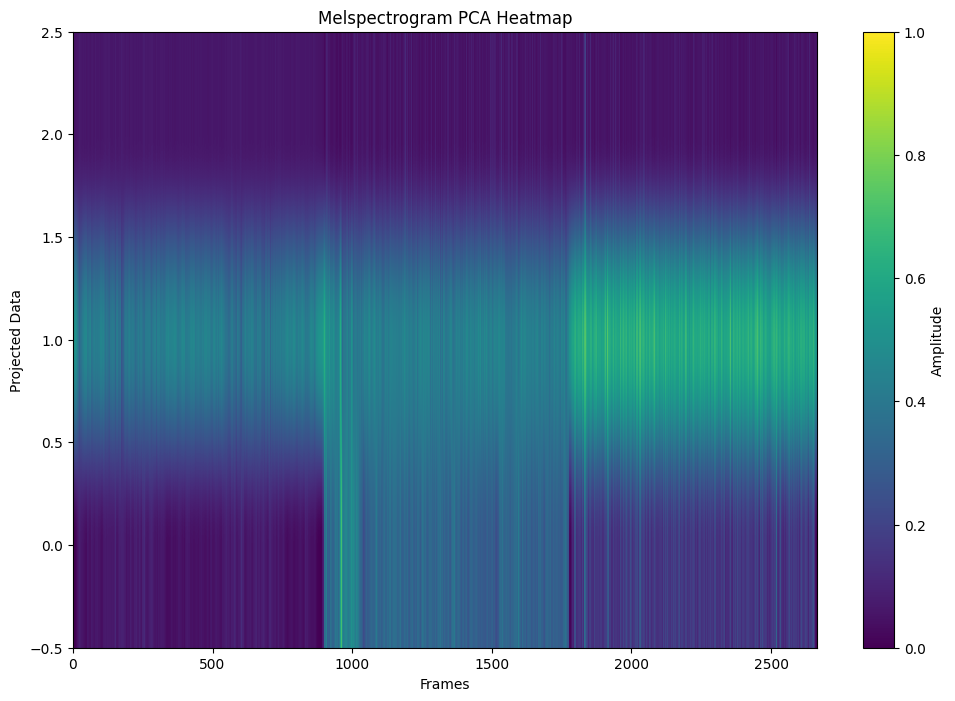

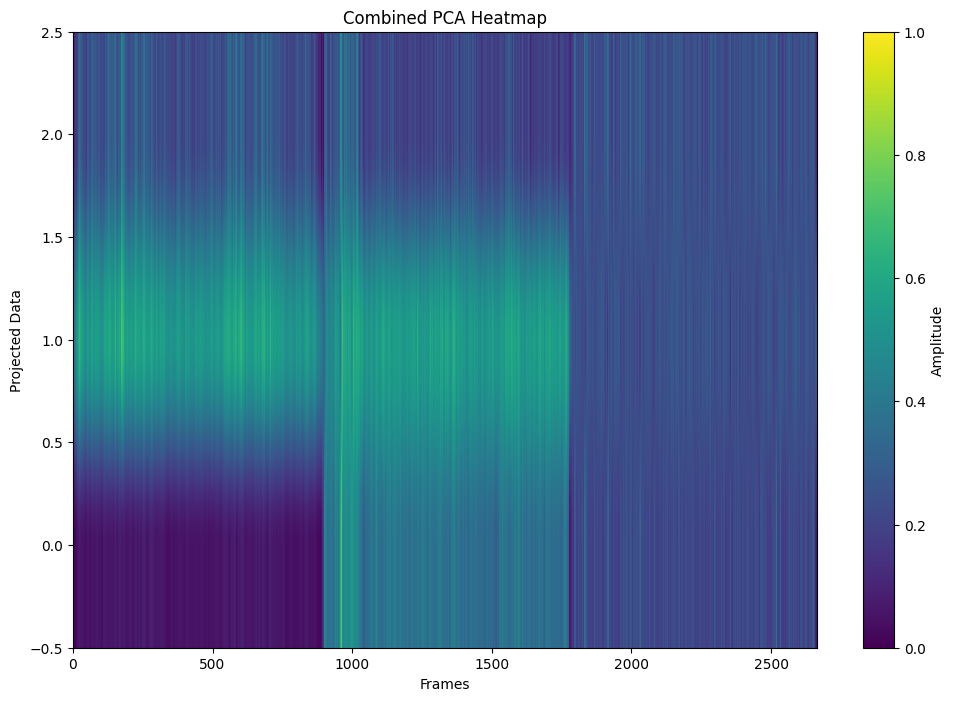

In [9]:
import modules.PCA
importlib.reload(modules.PCA)
from modules.PCA import PCA

mfccs_pca = PCA('output/no_pca/mfccs_only.csv', 0.6)
mfccs_pca.plot_projected_data("MFCCs PCA Heatmap")

mfsc_pca = PCA('output/no_pca/melspec_only.csv', 0.6)
mfsc_pca.plot_projected_data("Melspectrogram PCA Heatmap")

combined_pca = PCA('output/no_pca/combined.csv', 0.6)
combined_pca.plot_projected_data("Combined PCA Heatmap")
dh.set_output('output/pca')

dh.features = mfccs_pca.projected_data
dh.generate_csv("mfccs_only.csv", pca=True)
time_series_tensor = dh.generate_time_series('mfccs_only.csv', 'mfccs')

dh.features = mfsc_pca.projected_data
dh.generate_csv("melspec_only.csv", pca=True)
time_series_tensor = dh.generate_time_series('melspec_only.csv', 'melspec')

dh.features = combined_pca.projected_data
dh.generate_csv("combined.csv", pca=True)
time_series_tensor = dh.generate_time_series('combined.csv', 'combined')

Clustering time series 0 - mfccs features
Accuracy: 0.9830508474576272
Confusion Matrix:
[[187   0   2]
 [  7 296   1]
 [  1   4 387]]


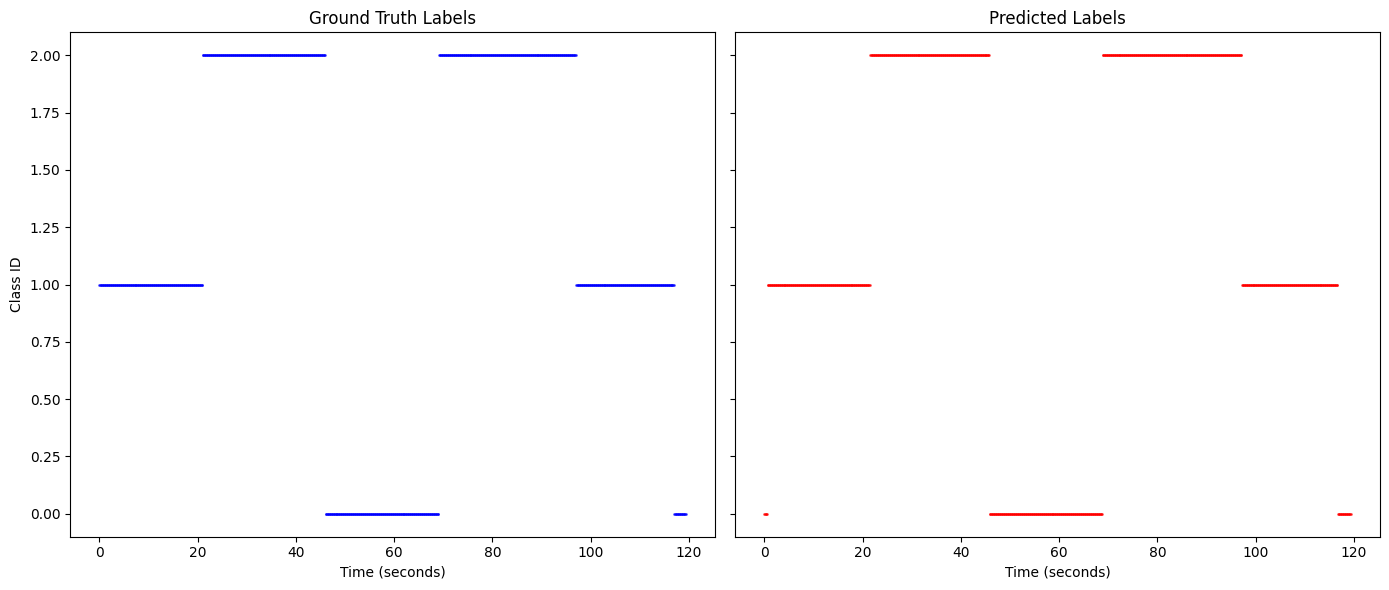

Clustering time series 0 - melspec features
Accuracy: 0.9853107344632769
Confusion Matrix:
[[224   0   1]
 [  1 317   8]
 [  0   3 331]]


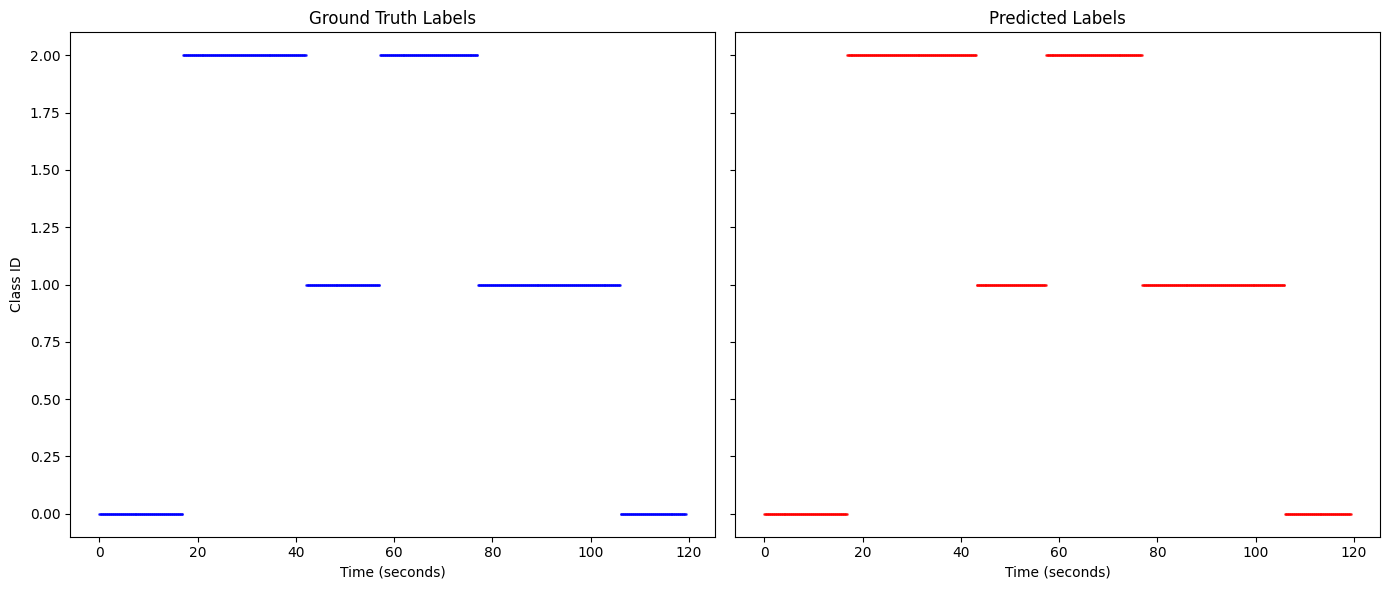

Clustering time series 0 - combined features
Accuracy: 0.9796610169491525
Confusion Matrix:
[[312   0   0]
 [ 13 200   0]
 [  0   0 355]]


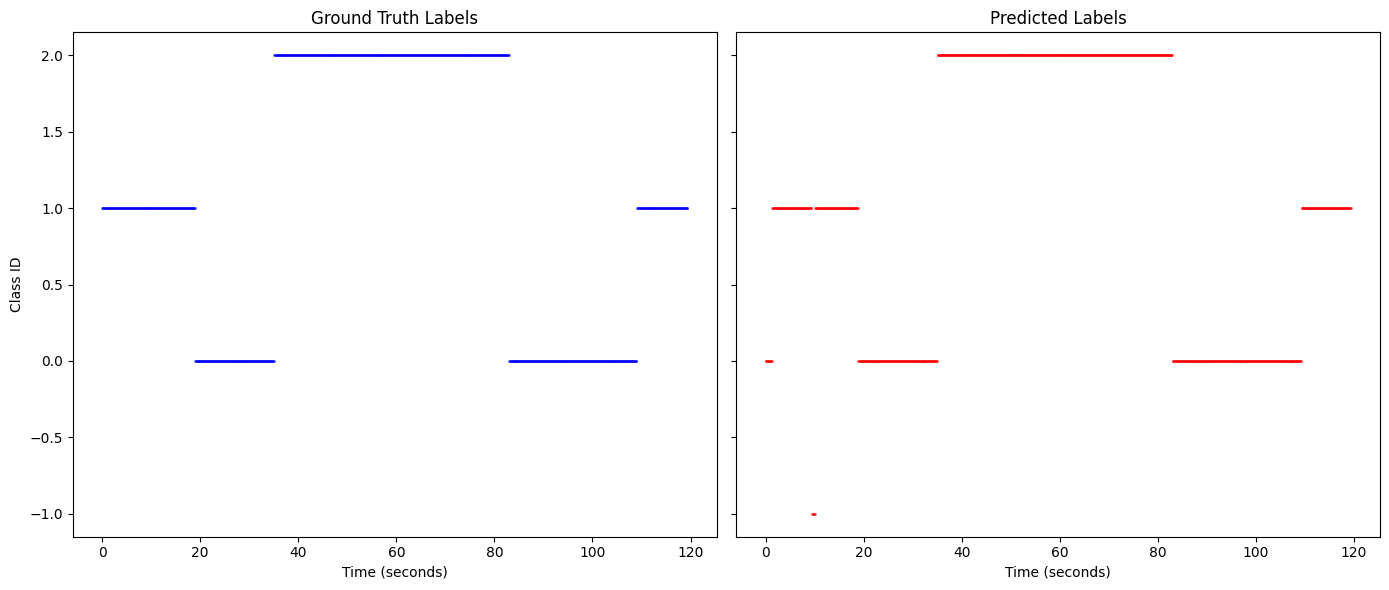

--------------------------------------------------------------------------------
Clustering time series 1 - mfccs features
Accuracy: 0.9966101694915255
Confusion Matrix:
[[223   0   0]
 [  2 319   0]
 [  0   1 340]]


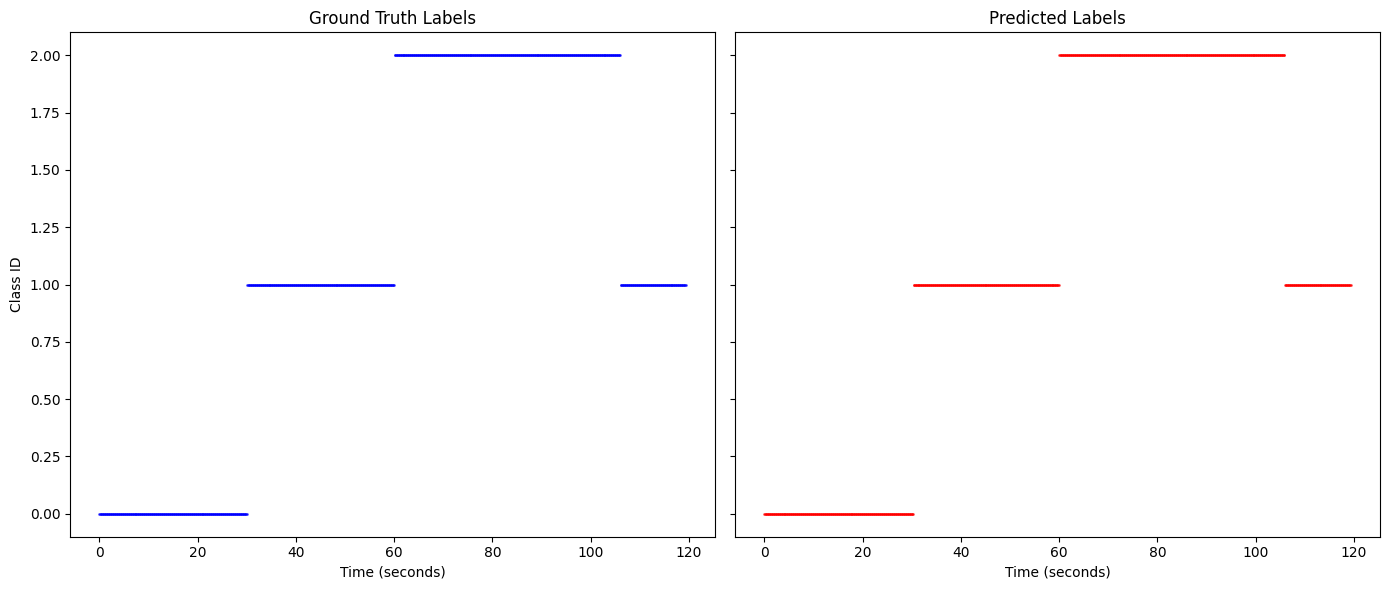

Clustering time series 1 - melspec features
Accuracy: 0.976271186440678
Confusion Matrix:
[[311   0   0]
 [  2 320  12]
 [  7   0 233]]


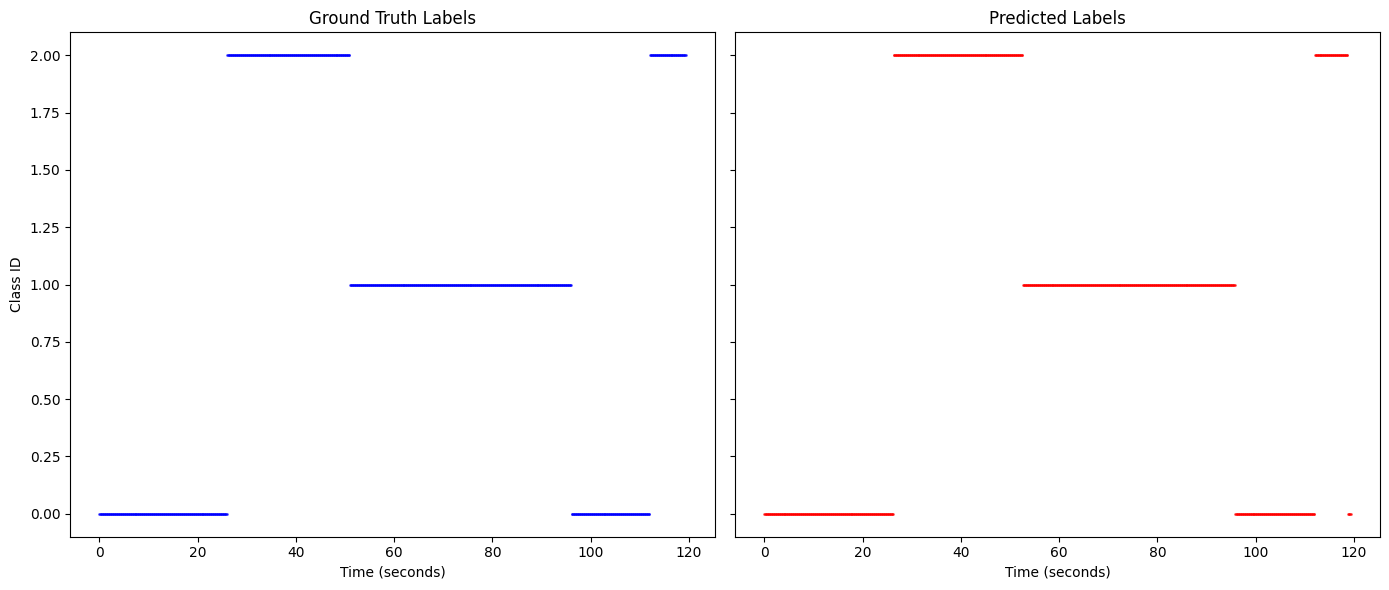

Clustering time series 1 - combined features
Accuracy: 0.8169491525423729
Confusion Matrix:
[[348   0   3]
 [154   0   2]
 [  3   0 375]]


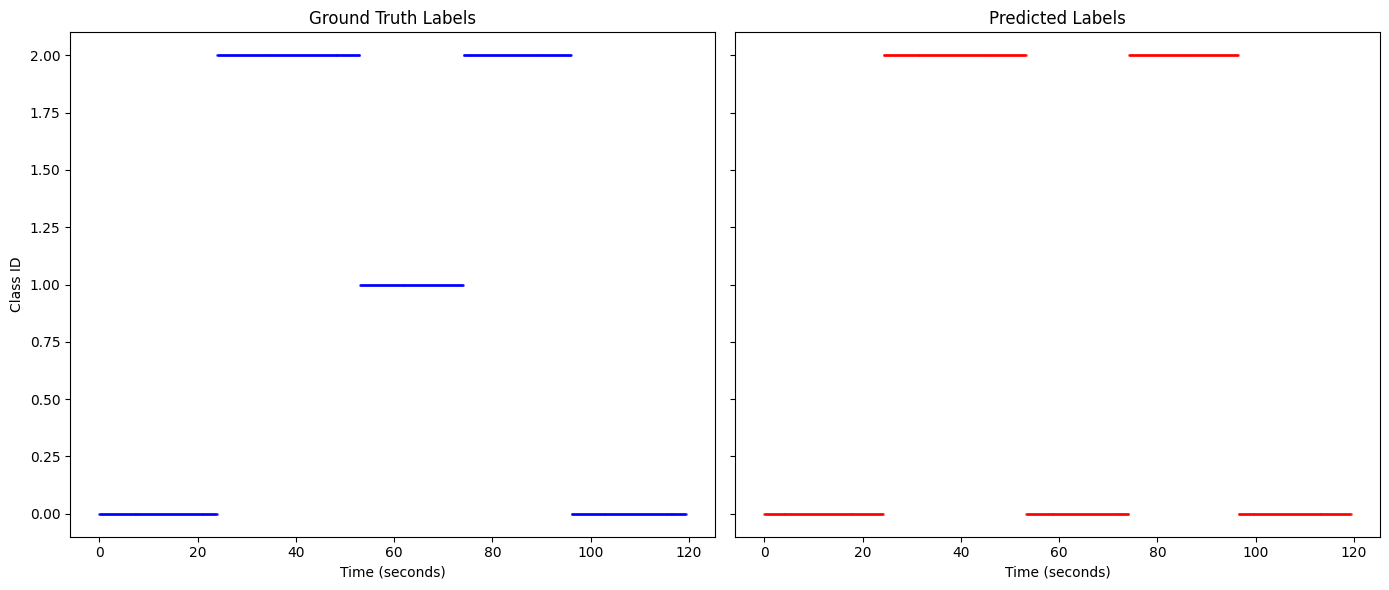

--------------------------------------------------------------------------------
Clustering time series 2 - mfccs features
Accuracy: 0.9898305084745763
Confusion Matrix:
[[345   0   3]
 [  5 205   1]
 [  0   0 326]]


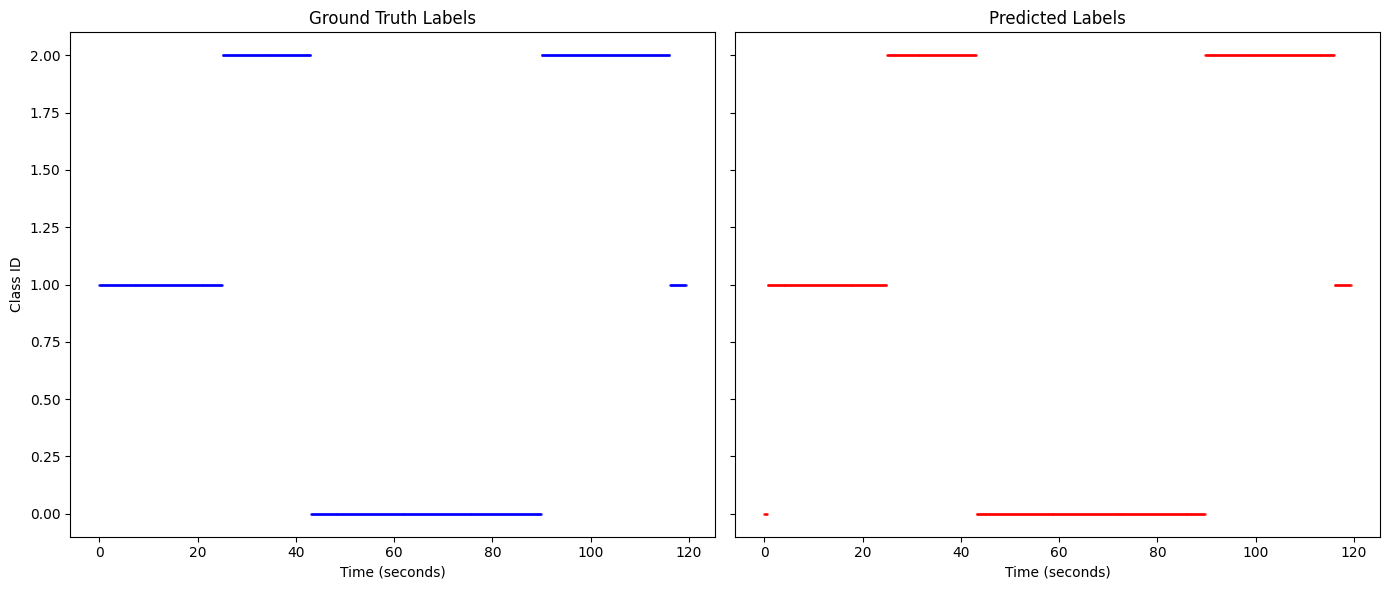

Clustering time series 2 - melspec features
Accuracy: 0.9254237288135593
Confusion Matrix:
[[399   0   1]
 [ 10 134   3]
 [ 46   1 286]]


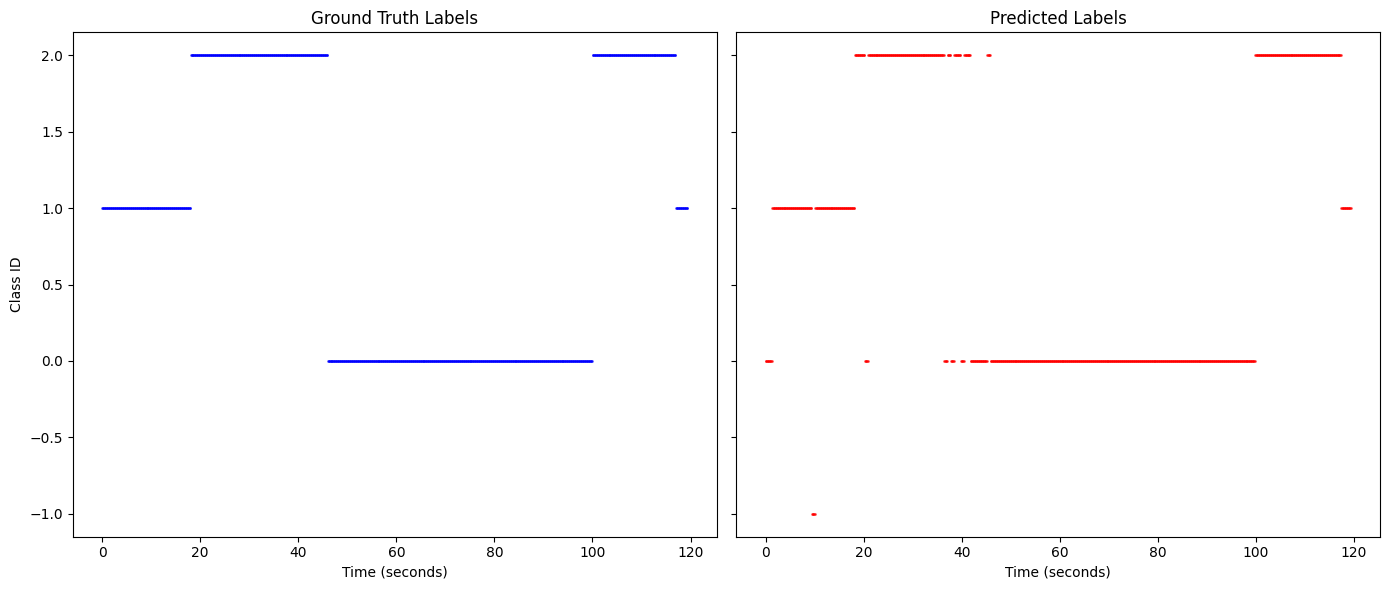

Clustering time series 2 - combined features
Accuracy: 0.6813559322033899
Confusion Matrix:
[[  0 277   0]
 [  0 388   5]
 [  0   0 215]]


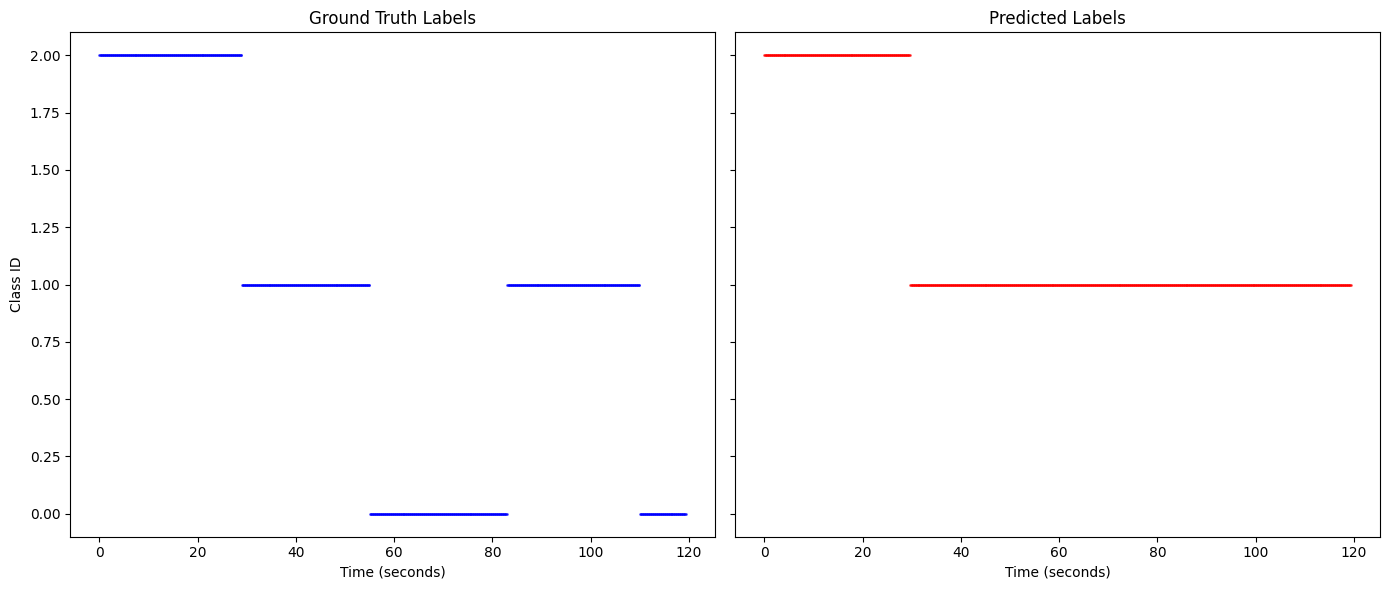

--------------------------------------------------------------------------------
Clustering time series 3 - mfccs features
Accuracy: 0.9954802259887006
Confusion Matrix:
[[393   0   0]
 [  2 265   2]
 [  0   0 223]]


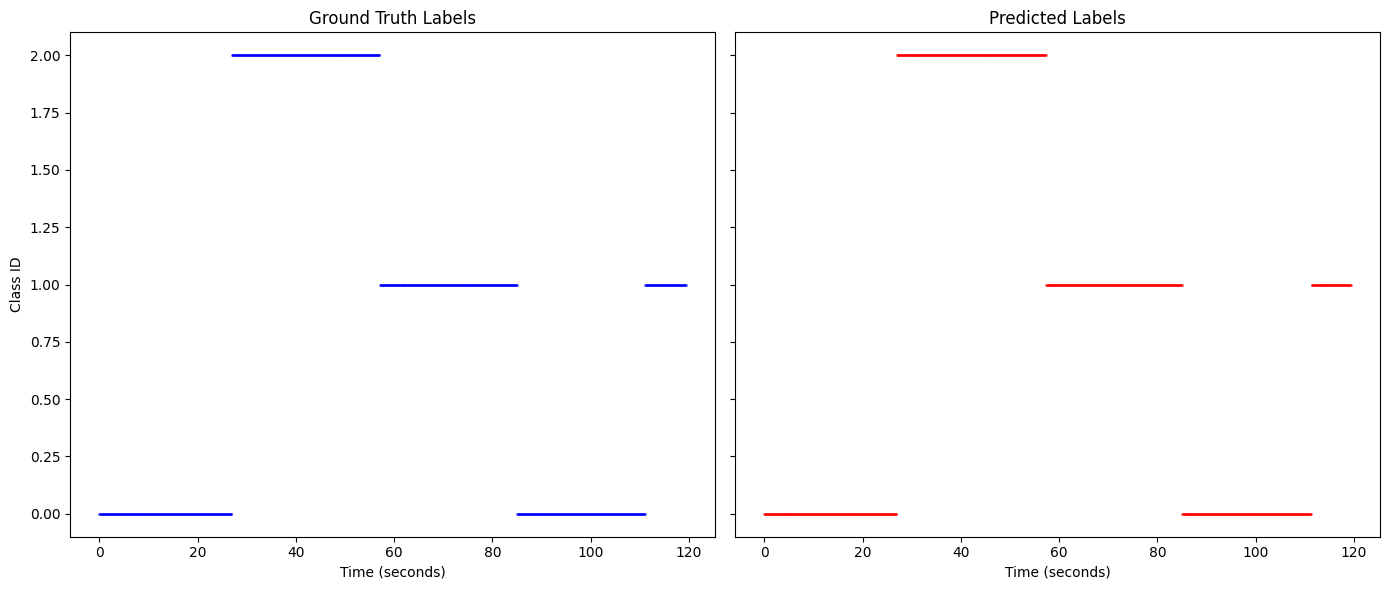

Clustering time series 3 - melspec features
Accuracy: 0.6067796610169491
Confusion Matrix:
[[213 151   0]
 [  0 244   0]
 [197   0  80]]


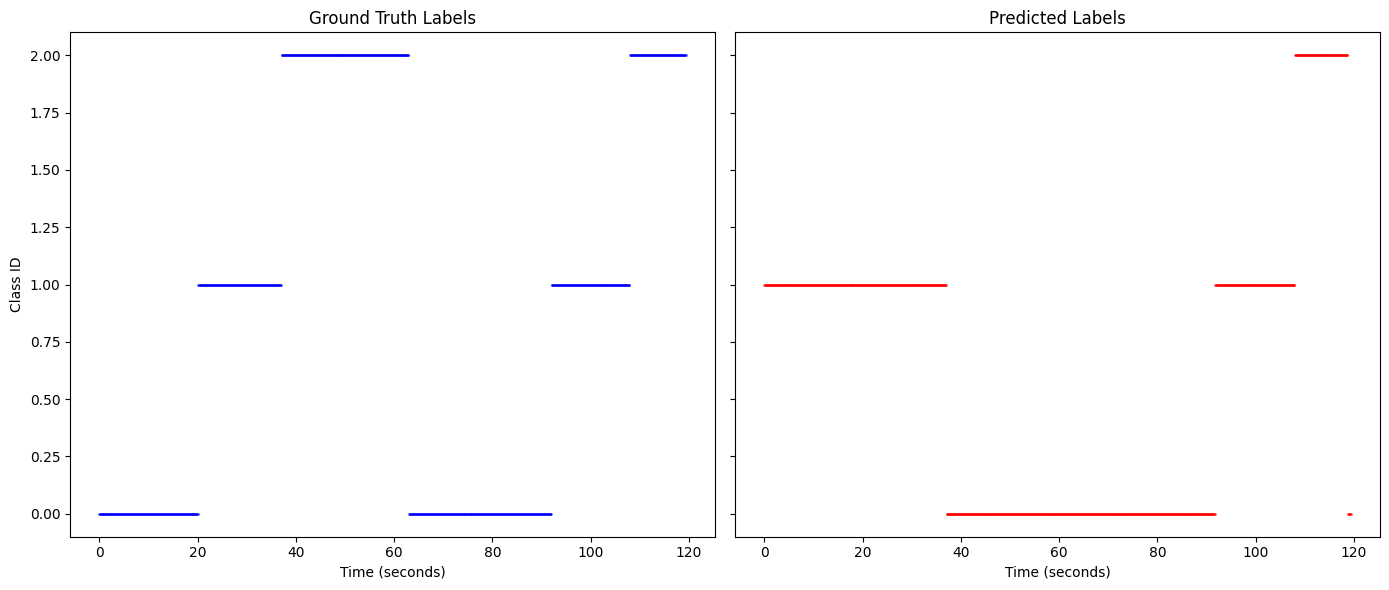

Clustering time series 3 - combined features
Accuracy: 0.7096045197740113
Confusion Matrix:
[[347   2   0]
 [ 11 281   5]
 [177  62   0]]


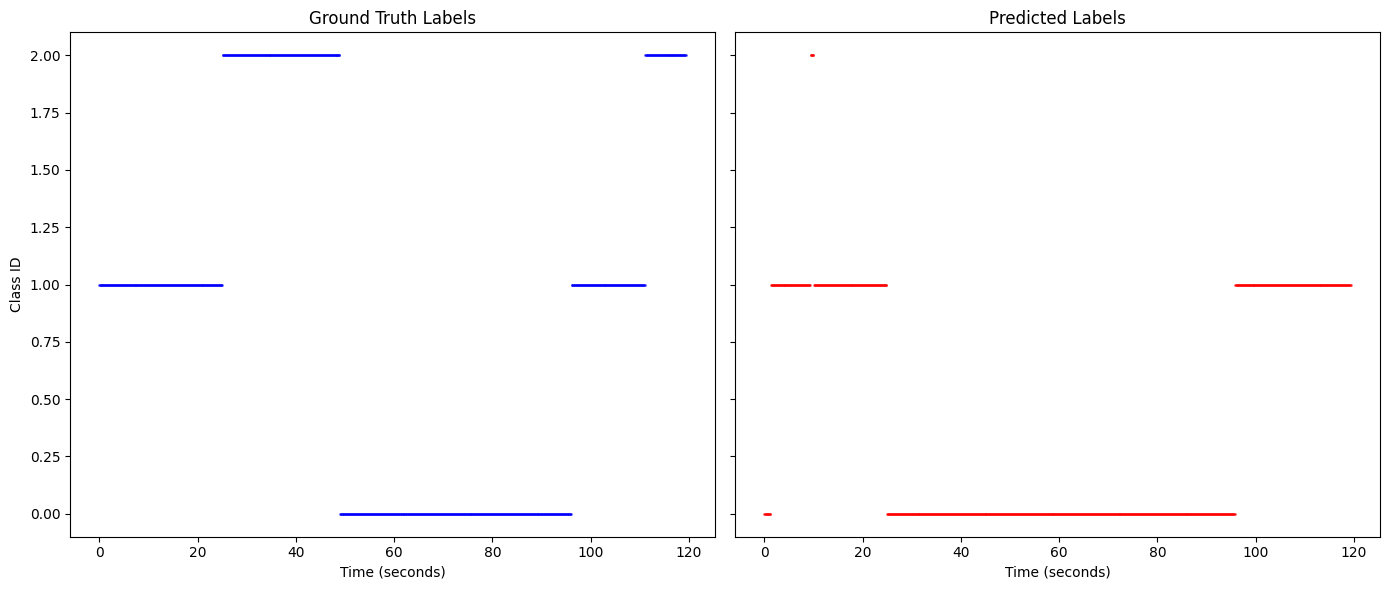

--------------------------------------------------------------------------------
Clustering time series 4 - mfccs features
Accuracy: 0.9954802259887006
Confusion Matrix:
[[370   2   2]
 [  0 333   0]
 [  0   0 178]]


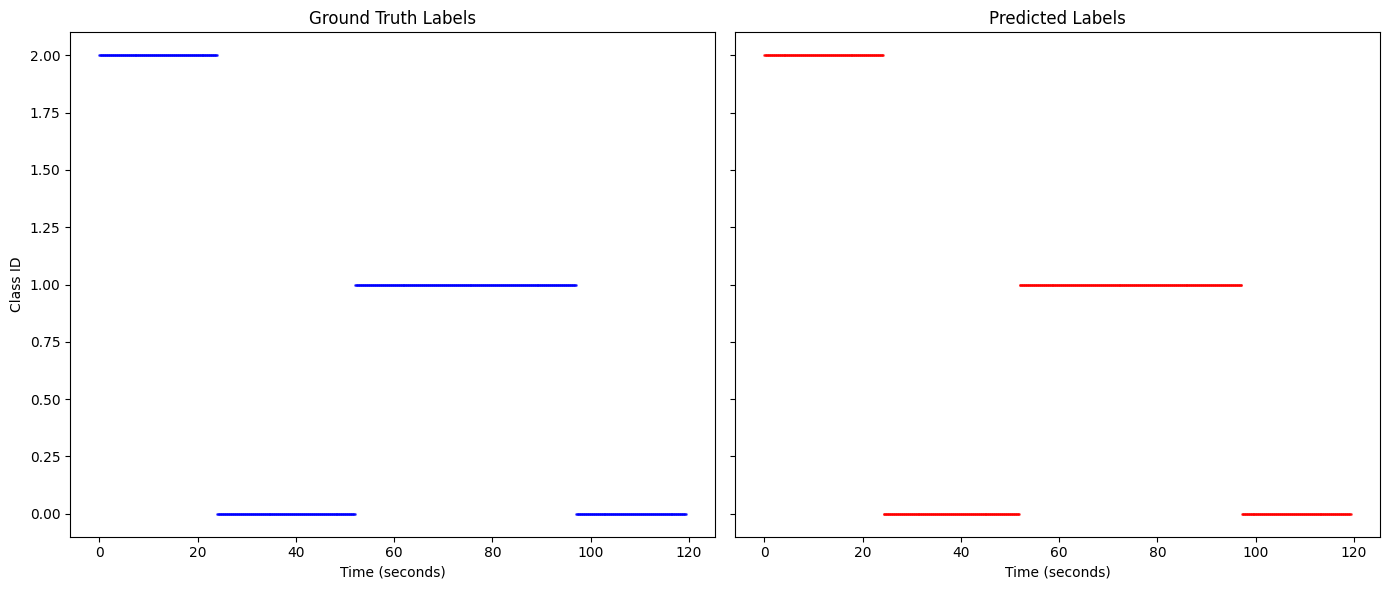

Clustering time series 4 - melspec features
Accuracy: 0.6542372881355932
Confusion Matrix:
[[  0   0 284]
 [  5 260  17]
 [  0   0 319]]


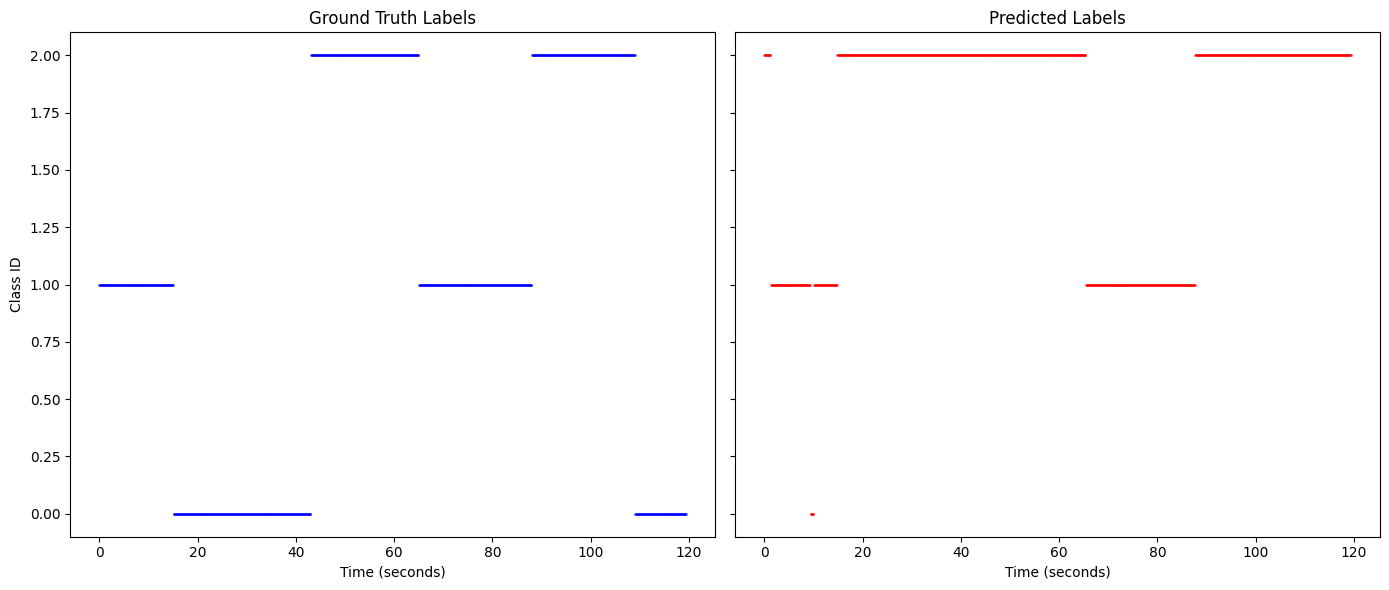

Clustering time series 4 - combined features
Accuracy: 0.36045197740112994
Confusion Matrix:
[[  0 311   0]
 [  0 319   0]
 [  0 255   0]]


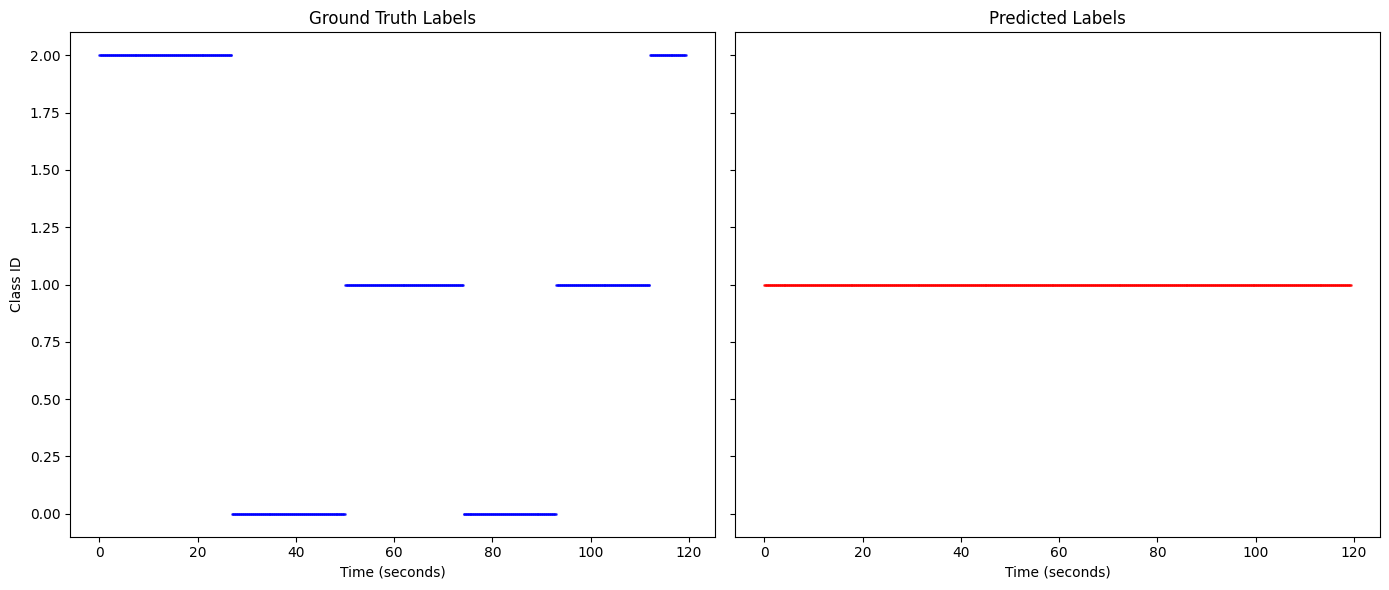

--------------------------------------------------------------------------------


In [10]:
MFCC_PCA_VIGILANCE = 0.15
MELSPEC_PCA_VIGILANCE = 0.05
COMBINED_PCA_VIGILANCE = 0.126

for i in range(5):
    cluster_dataset(i, 'mfccs', mfccs_pca.projected_data.shape[1], 'PCA MFCCs Only Ground Truth vs Predicted Labels', MFCC_PCA_VIGILANCE, True)
    cluster_dataset(i, 'melspec', mfsc_pca.projected_data.shape[1], 'PCA MFSCs Only Ground Truth vs Predicted Labels', MELSPEC_PCA_VIGILANCE, True)
    cluster_dataset(i, 'combined', combined_pca.projected_data.shape[1], 'PCA Combined Ground Truth vs Predicted Labels', COMBINED_PCA_VIGILANCE, True)
    print('-'*80)